In [1]:
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[8]


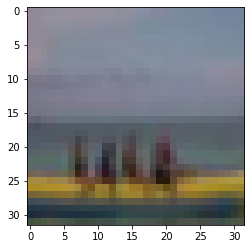

In [7]:
i=1092
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\mg\.conda\envs\office\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


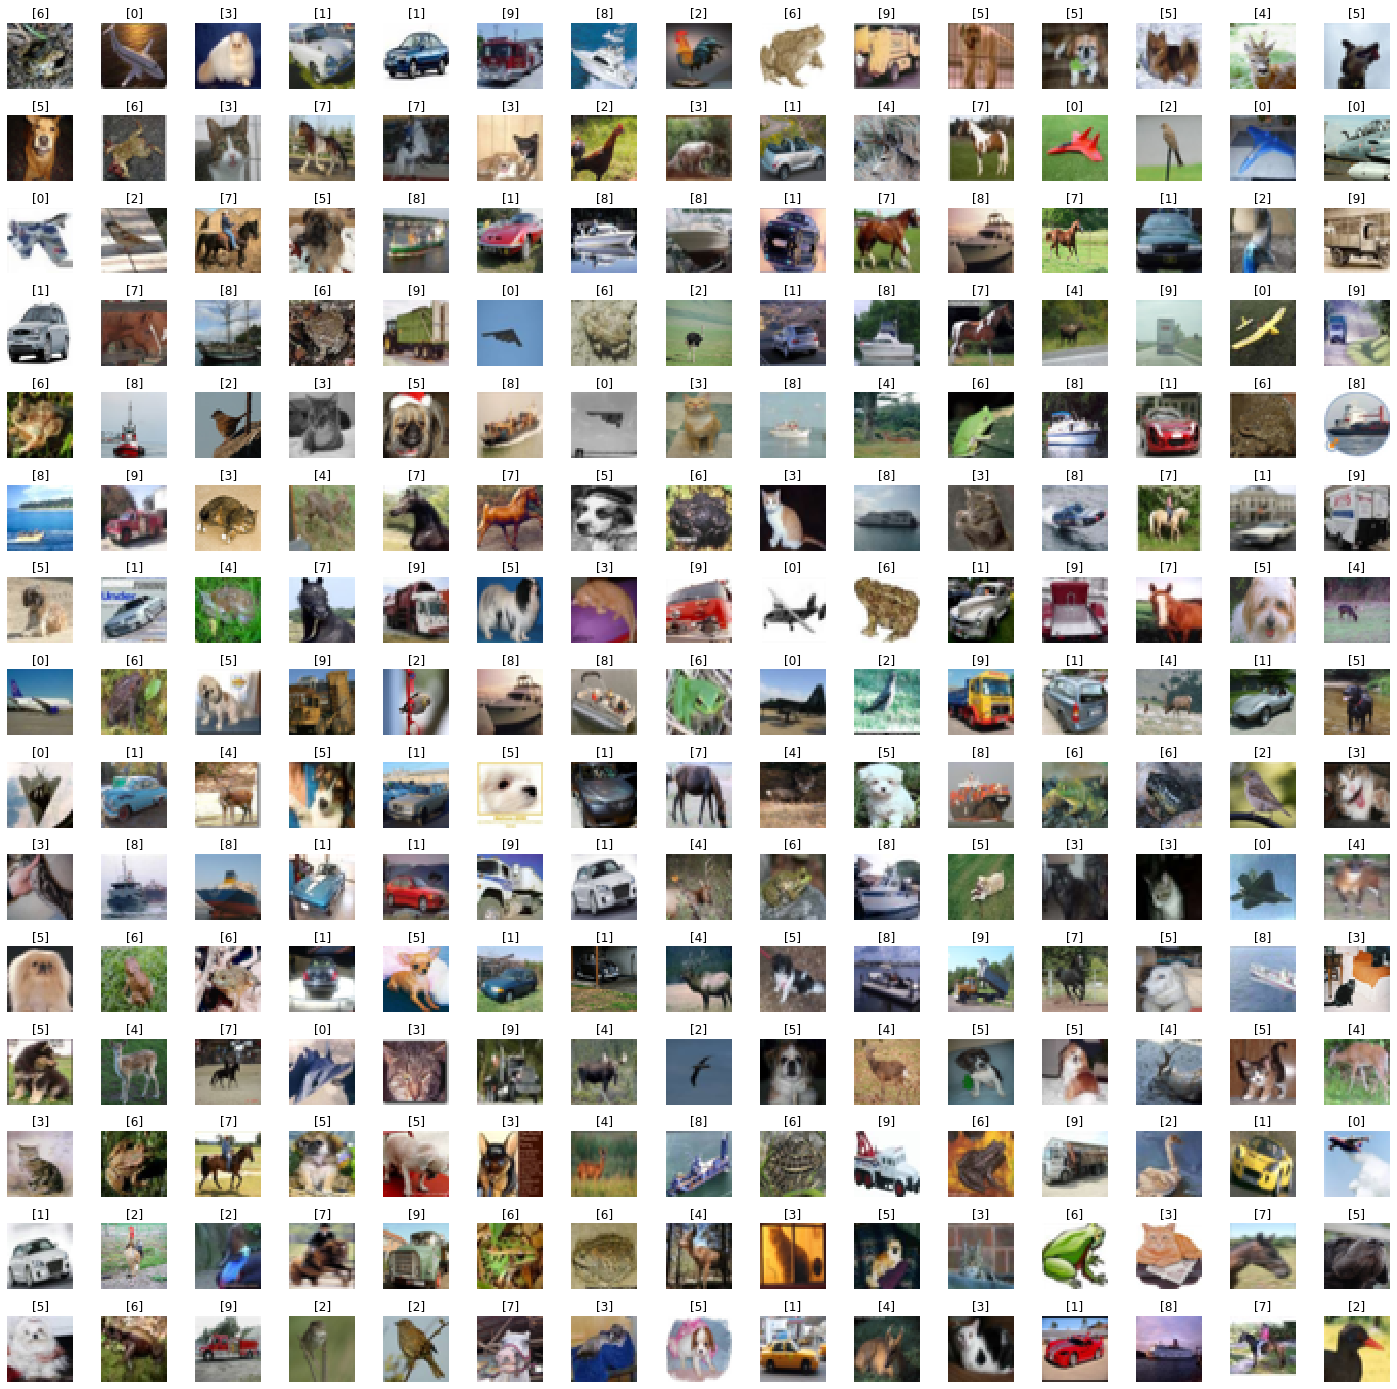

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = to_categorical(y_test, num_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
input_shape = X_train.shape[1:]

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50000/50000 [==============================] - 397s 8ms/step - loss: 1.5748 - acc: 0.4346
Epoch 2/20
50000/50000 [==============================] - 372s 7ms/step - loss: 1.1898 - acc: 0.5905
Epoch 3/20
50000/50000 [==============================] - 362s 7ms/step - loss: 1.0749 - acc: 0.6353
Epoch 4/20
50000/50000 [==============================] - 368s 7ms/step - loss: 1.0147 - acc: 0.6637
Epoch 5/20
50000/50000 [==============================] - 373s 7ms/step - loss: 0.9798 - acc: 0.6749
Epoch 6/20
50000/50000 [==============================] - 442s 9ms/step - loss: 0.9597 - acc: 0.6854
Epoch 7/20
50000/50000 [==============================] - 497s 10ms/step - loss: 0.9614 - acc: 0.6898
Epoch 8/20
50000/50000 [==============================] - 482s 10ms/step - loss: 0.9629 - acc: 0.6921
Epoch 9/20
50000/50000 [==============================] - 426s 9ms/step - loss: 0.9611 - acc: 0.6947
Epoch 10/20
50000/50000 [================

In [18]:
evaluation = model.evaluate(X_test, y_test)
print(evaluation[1])

10000/10000 [==============================] - 36s 4ms/step
0.5964


In [19]:
predicted = model.predict_classes(X_test)

In [20]:
y_test = y_test.argmax(1)

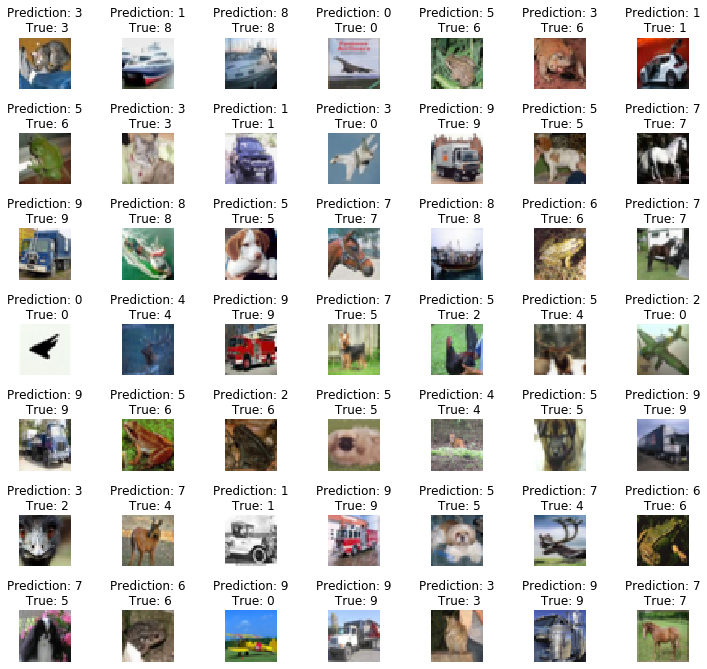

In [21]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction: {}\n True: {}".format(predicted[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
cm

array([[646,  29,  31,  71,   0,  11,   0,  74,  60,  78],
       [  4, 922,   0,  10,   0,   4,   0,  10,   4,  46],
       [ 40,   3, 327,  53,  11, 400,   1, 153,   4,   8],
       [  5,   4,   9, 370,   2, 331,   2, 256,   3,  18],
       [  9,   7,  18,  70, 209, 285,   0, 395,   2,   5],
       [  0,   3,   4,  64,   0, 737,   0, 187,   0,   5],
       [  1,   9,  48, 235,  22, 334, 254,  73,   8,  16],
       [  2,   1,   0,  12,   0,  34,   0, 947,   1,   3],
       [ 90,  56,   2,  23,   0,   5,   0,  32, 749,  43],
       [ 20, 121,   0,   7,   0,   3,   0,  40,   6, 803]], dtype=int64)

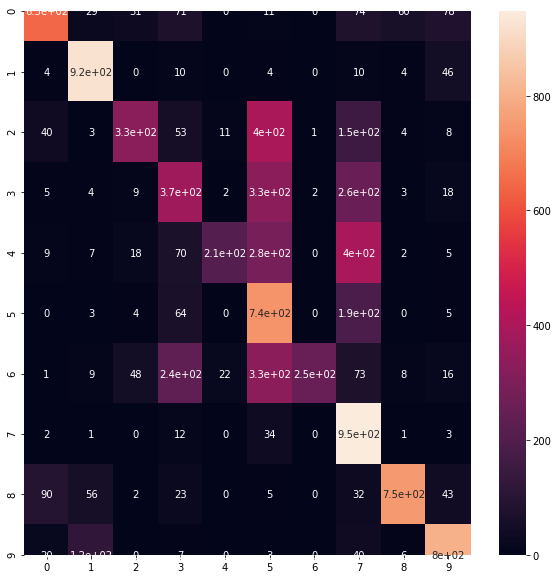

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)


In [24]:
import os

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "cifar10-model.h5")
model.save(model_path)

In [25]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [27]:
from keras.preprocessing.image import ImageDataGenerator
n=12
X_train_sample = X_train[:n]
datagen_train = ImageDataGenerator(vertical_flip=True)
#datagen_train.fit(X_train_sample)

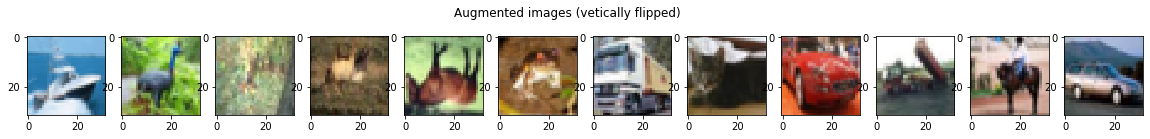

In [28]:
from keras.preprocessing.image import array_to_img


fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (vetically flipped)')
     plt.show()
     break;

In [31]:
from keras.preprocessing.image import ImageDataGenerator

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
X_train = X_train/255
X_test = X_test/255
datagen = ImageDataGenerator(
                                rotation_range=90,
                                horizontal_flip=True,
                                vertical_flip=True,
                                width_shift_range=0.1
                            )
datagen.fit(X_train)

In [32]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32),steps_per_epoch=50000/32, epochs = 10)

Epoch 1/10
1563/1562 [==============================] - 384s 246ms/step - loss: 1.9154 - acc: 0.3293
Epoch 2/10
1563/1562 [==============================] - 376s 241ms/step - loss: 1.8037 - acc: 0.3571
Epoch 3/10
1563/1562 [==============================] - 369s 236ms/step - loss: 1.7573 - acc: 0.3727
Epoch 4/10
1563/1562 [==============================] - 420s 269ms/step - loss: 1.7485 - acc: 0.3765
Epoch 5/10
1563/1562 [==============================] - 486s 311ms/step - loss: 1.7181 - acc: 0.3877
Epoch 6/10
1563/1562 [==============================] - 472s 302ms/step - loss: 1.7163 - acc: 0.3978
Epoch 7/10
1563/1562 [==============================] - 505s 323ms/step - loss: 1.6955 - acc: 0.4018
Epoch 8/10
1563/1562 [==============================] - 481s 308ms/step - loss: 1.6619 - acc: 0.4126
Epoch 9/10
1563/1562 [==============================] - 436s 279ms/step - loss: 1.6681 - acc: 0.4091
Epoch 10/10
1563/1562 [==============================] - 406s 260ms/step - loss: 1.6612 - a

In [33]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "cifar10-model-aug.h5")
model.save(model_path)